In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt
from google.colab import files
import time

In [0]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [0]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Q-learning algorithm

def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # if Q-matrix is 0, select random, else follow epsilon greedy policy
  if Q[current_state, :].sum() == 0:
    action = np.random.choice(av_act, size=1)
  
  else:
    if np.random.uniform(0,1) < epsilon:
      action = np.random.choice(av_act, size=1)
    else:
      action = np.argmax(Q[current_state, :])
    
  # find max Q value after action
  next_state_row = R[action,]
  next_av_act = np.where(next_state_row >= 0)[1]
  
  if Q[action, :].sum() == 0:
    next_action = np.random.choice(next_av_act, size=1)
  
  else:
    next_action = np.argmax(Q[action, :])
  
  # update Q-matrix
  Q[current_state, action] = Q[current_state, action] + alpha * (R[current_state, action] + gamma * Q[action, next_action] - Q[current_state, action])
  
  # return Q-matrix and number of steps
  return Q, alpha, gamma, epsilon, decay 

In [0]:
# Evaluation function

def evaluate(Q, episode, alpha, gamma, epsilon, decay):
  
  # initiate current state
#   current_state = randint(0,10)
  current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # when Q-matrix is 0, select randomly from available actions
      if Q[current_state, av_act].sum() == 0:
        next_step = int(np.random.choice(av_act, size=1))
      
      # when Q-matrix is not 0, select the best action or one of the best actions
      else:
        
        # index for maximum value
        max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
        
        # if more than 1 max value, randomly choose one; otherwise, choose the max value
        if max_index.shape[0] > 1:
          next_step = int(np.random.choice(max_index, size = 1))
        else:
          next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, next_step])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, alpha, gamma, epsilon, decay, reward/len(steps)))  
  step_cont.append((episode, alpha, gamma, epsilon, decay, len(steps)))
  
  return average_reward, step_cont, steps

In [0]:
# Define initial parameters 
alpha = 0.9 # alpha is the learning rate
gammas = [0.01, 0.1, 0.5, 0.8, 1] # gamma is the discount factor 
epsilon = 0.9 # epsilon is the exploration factor
decay = 0.999 # df is the decay factor for epsilon


In [0]:
# Iterate and produce Q-matrix

average_reward = []
step_cont = []
Q_sum = []
all_steps = []
optimal = []

start = time.time()

for gamma in gammas:
  for episode in range(1000):
    Q, alpha, gamma, epsilon, decay = q_learning(alpha, gamma, epsilon, decay)
    
    if np.matrix.max(Q) > 0:
      Q_norm = (Q/np.matrix.max(Q)*100)
    else:
      Q_norm = Q

    # calculate the average reward from optimal path
    optimal.append((episode, alpha, gamma, epsilon, decay, ((Q_norm[8,4]+Q_norm[4,5]+Q_norm[5,6])/4)))
    average_reward, step_cont, steps = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
    epsilon *= decay
    Q_sum.append(Q_norm)
    all_steps.append(steps)

  # Set Q-matrix and epsilon to initial value
  Q = np.matrix(np.zeros([11,11]))
  epsilon = 0.9
          
end = time.time()
                  
print(Q_norm.astype(int))
# print(average_reward)
# print(step_cont)
print('Time used :', end-start, 'seconds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


[[ 77  94   0   0  97   0   0   0   0   0   0]
 [ 77  86  94   0  69  90   0   0   0   0   0]
 [  0  93  91  92   0   0 100   0   0   0   0]
 [  0   0  97  95   0   0  99   0   0   0   0]
 [ 67  89   0   0  87  98   0   0  91  86   0]
 [  0  90   0   0  88  89  98  86   0   0   0]
 [  0   0  77  97   0  92  82  90   0   0   0]
 [  0   0   0   0   0  98  95  96   0   0  66]
 [  0   0   0   0  92   0   0   0  92  97   0]
 [  0   0   0   0  89   0   0   0  80  44  97]
 [  0   0   0   0   0   0   0  97   0  90  92]]
Time used : 2.3537676334381104 seconds


In [0]:
# Check intermedia Q-matrix

Q_ = Q_sum[2000]
Q_ = (Q_/np.matrix.max(Q_)*100)
Q_.astype(int)
# Q_

matrix([[ 12,  24,   0,   0,  24,   0,   0,   0,   0,   0,   0],
        [ 12,  24,  49,   0,  24,  49,   0,   0,   0,   0,   0],
        [  0,  24,  49,  49,   0,   0, 100,   0,   0,   0,   0],
        [  0,   0,  49,  49,   0,   0,  99,   0,   0,   0,   0],
        [ 12,  24,   0,   0,  24,  49,   0,   0,  12,  12,   0],
        [  0,  24,   0,   0,  24,  49,  99,  49,   0,   0,   0],
        [  0,   0,  49,  49,   0,  49,  99,  49,   0,   0,   0],
        [  0,   0,   0,   0,   0,  49,  99,  49,   0,   0,  24],
        [  0,   0,   0,   0,  24,   0,   0,   0,  12,  12,   0],
        [  0,   0,   0,   0,  24,   0,   0,   0,  12,  12,  24],
        [  0,   0,   0,   0,   0,   0,   0,  49,   0,  12,  24]])

In [0]:
# Turn results into dataframe

df_reward = pd.DataFrame.from_records(average_reward, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Steps'])
df_optimal = pd.DataFrame.from_records(optimal, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Optimal'])

df = pd.merge(df_reward, df_step, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
df = pd.merge(df, df_optimal, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
print(df.shape)
df.head(10)

(5000, 8)


,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps,Optimal
0,0,0.9,0.01,0.900000,0.999,0.0,21,0.0
1,1,0.9,0.01,0.899100,0.999,0.0,68,0.0
2,2,0.9,0.01,0.898201,0.999,0.0,35,0.0
3,3,0.9,0.01,0.897303,0.999,0.0,14,0.0
4,4,0.9,0.01,0.896405,0.999,0.0,9,0.0
5,5,0.9,0.01,0.895509,0.999,0.0,11,0.0
6,6,0.9,0.01,0.894613,0.999,0.0,25,0.0
7,7,0.9,0.01,0.893719,0.999,0.0,40,0.0
8,8,0.9,0.01,0.892825,0.999,0.0,38,0.0
9,9,0.9,0.01,0.891932,0.999,0.0,34,0.0


In [0]:
# df.to_excel('grid_search_discount_rate.xlsx')
# files.download('grid_search_discount_rate.xlsx')

In [0]:
# Preparation before plot

df_001 = df[df['gamma'] == 0.01]
df_001_1 = df_001.rename(columns={'Average Reward Per Step': r'$\gamma=0.01$'})
df_001_2 = df_001.rename(columns={'Steps': r'$\gamma=0.01$'})

df_01 = df[df['gamma'] == 0.1]
df_01_1 = df_01.rename(columns={'Average Reward Per Step': r'$\gamma=0.1$'})
df_01_2 = df_01.rename(columns={'Steps': r'$\gamma=0.1$'})

df_05 = df[df['gamma'] == 0.5]
df_05_1 = df_05.rename(columns={'Average Reward Per Step': r'$\gamma=0.5$'})
df_05_2 = df_05.rename(columns={'Steps': r'$\gamma=0.5$'})

df_09 = df[df['gamma'] == 0.8]
df_09_1 = df_09.rename(columns={'Average Reward Per Step': r'$\gamma=0.8$'})
df_09_2 = df_09.rename(columns={'Steps': r'$\gamma=0.8$'})

df_1 = df[df['gamma'] == 1]
df_1_1 = df_1.rename(columns={'Average Reward Per Step': r'$\gamma=1$'})
df_1_2 = df_1.rename(columns={'Steps': r'$\gamma=1$'})

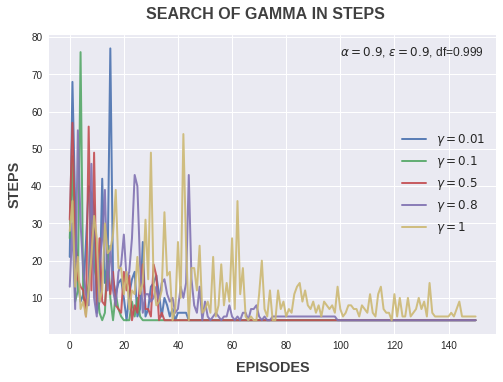

In [0]:
# Plot step

plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.plot(df_001_2['episode'][df_001['episode']<=150], df_001_2[r'$\gamma=0.01$'][df_001['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_01_2['episode'][df_01['episode']<=150], df_01_2[r'$\gamma=0.1$'][df_01['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_05_2['episode'][df_05['episode']<=150], df_05_2[r'$\gamma=0.5$'][df_05['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_09_2['episode'][df_09['episode']<=150], df_09_2[r'$\gamma=0.8$'][df_09['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_1_2['episode'][df_1['episode']<=150], df_1_2[r'$\gamma=1$'][df_1['episode']<=150], linewidth=2, alpha=0.9)

fig.suptitle('SEARCH OF GAMMA IN STEPS', color='#404040', fontsize=16, y=0.95, fontweight='bold')
ax.set_xlabel('EPISODES', color='#404040', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('STEPS', color='#404040', fontsize='large', fontweight='bold', labelpad=10)

plt.text(100, 75, r'$\alpha=0.9$, $\epsilon=0.9$, df=0.999')
ax.legend(loc='right', fontsize='medium')

plt.show()

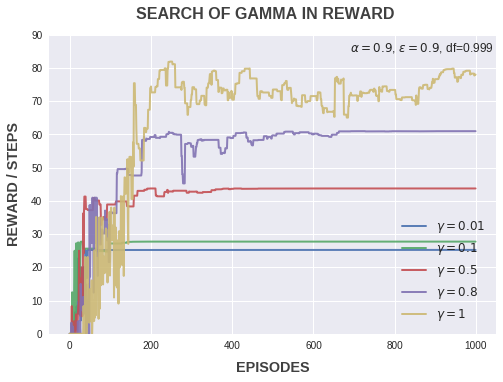

In [0]:
# Plot average reward per step

plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.plot(df_001_1['episode'], df_001_1[r'$\gamma=0.01$'], linewidth=2, alpha=0.9)
ax.plot(df_01_1['episode'], df_01_1[r'$\gamma=0.1$'], linewidth=2, alpha=0.9)
ax.plot(df_05_1['episode'], df_05_1[r'$\gamma=0.5$'], linewidth=2, alpha=0.9)
ax.plot(df_09_1['episode'], df_09_1[r'$\gamma=0.8$'], linewidth=2, alpha=0.9)
ax.plot(df_1_1['episode'], df_1_1[r'$\gamma=1$'], linewidth=2, alpha=0.9)

fig.suptitle('SEARCH OF GAMMA IN REWARD', color='#404040', fontsize=16, y=0.95, fontweight='bold')
ax.set_xlabel('EPISODES', color='#404040', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('REWARD / STEPS', color='#404040', fontsize='large', fontweight='bold', labelpad=10)

plt.text(690, 85, r'$\alpha=0.9$, $\epsilon=0.9$, df=0.999')
ax.legend(loc='lower right', fontsize='medium')

ax.set_ylim(0, 90)

plt.show()

In [0]:
df_stats = df[['gamma','Average Reward Per Step']]
df_stats.head(5)

,gamma,Average Reward Per Step
0,0.01,0.0
1,0.01,0.0
2,0.01,0.0
3,0.01,0.0
4,0.01,0.0


In [0]:
df_stats_1 = df_stats.groupby(['gamma']).describe().round(decimals=1)
df_stats_1

Average Reward Per Step                                         
                        count  mean   std  min   25%   50%   75%   max
gamma                                                                 
0.01                   1000.0  24.5   3.8  0.0  25.3  25.3  25.3  25.3
0.10                   1000.0  27.1   3.1  0.0  27.7  27.7  27.8  27.8
0.50                   1000.0  41.6   7.1  0.0  42.8  43.7  43.7  43.7
0.80                   1000.0  54.5  13.8  0.0  58.0  59.9  60.9  61.0
1.00                   1000.0  64.7  21.1  0.0  68.5  72.6  75.4  81.9

In [0]:
df_stats_2 = df_stats_1.drop(columns=['count','min','25%','75%'], level=1, axis=1)
df_stats_2

Average Reward Per Step                  
                         mean   std   50%   max
gamma                                          
0.01                     24.5   3.8  25.3  25.3
0.10                     27.1   3.1  27.7  27.8
0.50                     41.6   7.1  43.7  43.7
0.80                     54.5  13.8  59.9  61.0
1.00                     64.7  21.1  72.6  81.9

In [0]:
df_stats_3 = df_stats_2.rename(columns={'50%': 'median'}, level=1)
df_stats_3

Average Reward Per Step                   
                         mean   std median   max
gamma                                           
0.01                     24.5   3.8   25.3  25.3
0.10                     27.1   3.1   27.7  27.8
0.50                     41.6   7.1   43.7  43.7
0.80                     54.5  13.8   59.9  61.0
1.00                     64.7  21.1   72.6  81.9

In [0]:
df_stats_4 = df_stats_3.rename(columns={'Average Reward Per Step': 'Reward/Steps'}, level=0)
df_stats_4

Reward/Steps                   
              mean   std median   max
gamma                                
0.01          24.5   3.8   25.3  25.3
0.10          27.1   3.1   27.7  27.8
0.50          41.6   7.1   43.7  43.7
0.80          54.5  13.8   59.9  61.0
1.00          64.7  21.1   72.6  81.9